In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_links = pd.read_csv('../data/links.csv')
df_movies = pd.read_csv('../data/movies.csv')
df_ratings = pd.read_csv('../data/ratings.csv')
df_tags = pd.read_csv('../data/tags.csv')

In [3]:
df_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [4]:
df_movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [5]:
df_tags.head(10)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


# Feature engineering

Since the genres are in a pipe separated string, lets separate them and create new columns with the name of the genres so we can use that data

In [6]:
df_movies['Action'] = 0
df_movies['Adventure'] = 0
df_movies['Animation'] = 0
df_movies['Children'] = 0
df_movies['Comedy'] = 0
df_movies['Crime'] = 0
df_movies['Documentary'] = 0
df_movies['Drama'] = 0
df_movies['Fantasy'] = 0
df_movies['Film-Noir'] = 0
df_movies['Horror'] = 0
df_movies['Musical'] = 0
df_movies['Mystery'] = 0
df_movies['Romance'] = 0
df_movies['Sci-Fi'] = 0
df_movies['Thriller'] = 0
df_movies['War'] = 0
df_movies['Western'] = 0

In [7]:
df_movies.head(10)

,movieId,title,genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),Action|Crime|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Sabrina (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,Tom and Huck (1995),Adventure|Children,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),Action,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
for i,row in df_movies.iterrows():
    genres = str(row['genres'])
    if genres != '(no genres listed)':
        genres = genres.split('|')
        for g in genres:
            df_movies.at[i, g] = 1

In [9]:
df_movies.head(10)

,movieId,title,genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,IMAX
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,NaN
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
5,6,Heat (1995),Action|Crime|Thriller,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,NaN
6,7,Sabrina (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,NaN
7,8,Tom and Huck (1995),Adventure|Children,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
8,9,Sudden Death (1995),Action,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9,10,GoldenEye (1995),Action|Adventure|Thriller,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN


In [12]:
df_movies = df_movies.fillna(0)

In [14]:
df_movies.head(20)

,movieId,title,genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,IMAX
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
5,6,Heat (1995),Action|Crime|Thriller,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0.0
6,7,Sabrina (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0.0
7,8,Tom and Huck (1995),Adventure|Children,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
8,9,Sudden Death (1995),Action,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.0


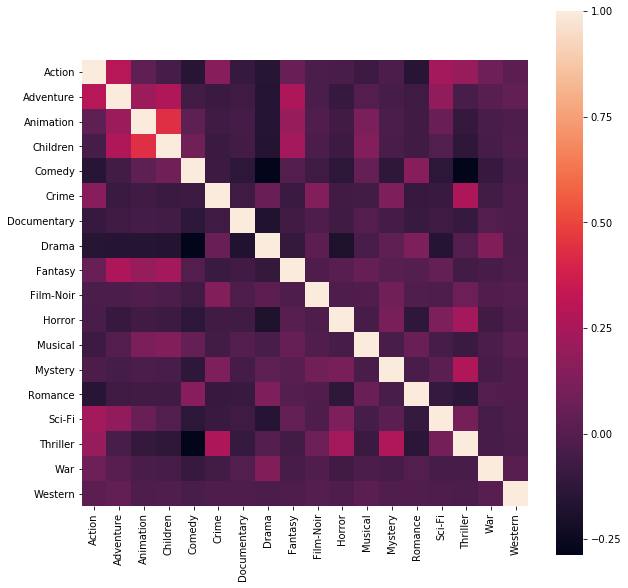

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
cl = df_movies[['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].corr()
sns.heatmap(cl, square = True, ax=ax)

Not many standouts besides the correlation between Animation and Children genres

In [44]:
df_movies['Rating'] = np.nan
df_movies['Reviews'] = np.nan

In [46]:
c = 0
for i,row in df_movies.iterrows():
    if c>3:
        break
    mid = row['movieId']
    rows = df_ratings.loc[df_ratings['movieId'] == mid]['rating']
    rating = rows.mean()
    reviews = rows.count()
    if rating != np.nan:
        df_movies.at[i, 'Rating'] = rating
    if reviews != np.nan:
        df_movies.at[i, 'Reviews'] = reviews

Let's add the total number of reviews and the average rating for each movie from the ratings dataframe

In [47]:
df_movies.head(20)

,movieId,title,genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,IMAX,Rating,Reviews
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0.0,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0.0,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0.0,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.0,3.071429,49.0
5,6,Heat (1995),Action|Crime|Thriller,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0.0,3.946078,102.0
6,7,Sabrina (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0.0,3.185185,54.0
7,8,Tom and Huck (1995),Adventure|Children,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,2.875000,8.0
8,9,Sudden Death (1995),Action,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,3.125000,16.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,3.496212,132.0


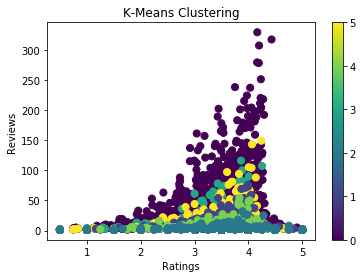

In [62]:
from sklearn.cluster import KMeans
X = df_movies[['movieId','Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]
km = KMeans(6)
km.fit(X)

pred = km.predict(X)
centroids = km.cluster_centers_
kmeans = pd.DataFrame(pred)

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_movies['Rating'], df_movies['Reviews'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Ratings')
ax.set_ylabel('Reviews')
plt.colorbar(scatter)

#source: https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python

As we can see there are 6 clusters based on the genre. There's an overall trend with the number of reviews being higher for movies with higher rating. T